### Tabular Reinforcement Learning


This notebook describes a simple RL class. 

It includes a constructor, q-learning and model-based RL with value iteration.

**Fill in the functions for q-learning and model-based RL with value iteration.**

**Run the code on the same maze problem as the MDP class and answer some questions below**.


## MDP Class


In [1]:
import numpy as np
from numpy.linalg import inv

class MDP:
    
    '''Constructor for the MDP class

    Inputs:
    T -- Transition function: |A| x |S| x |S'| array
    R -- Reward function: |A| x |S| array
    discount -- discount factor: scalar in [0,1)

    The constructor verifies that the inputs are valid and sets
    corresponding variables in a MDP object'''
    def __init__(self,T,R,discount):
        assert T.ndim == 3, "Invalid transition function: it should have 3 dimensions"
        self.nActions = T.shape[0]
        self.nStates = T.shape[1]
        assert T.shape == (self.nActions,self.nStates,self.nStates), "Invalid transition function: it has dimensionality " + repr(T.shape) + ", but it should be (nActions,nStates,nStates)"
        assert (abs(T.sum(2)-1) < 1e-5).all(), "Invalid transition function: some transition probability does not equal 1"
        self.T = T
        assert R.ndim == 2, "Invalid reward function: it should have 2 dimensions" 
        assert R.shape == (self.nActions,self.nStates), "Invalid reward function: it has dimensionality " + repr(R.shape) + ", but it should be (nActions,nStates)"
        self.R = R
        assert 0 <= discount < 1, "Invalid discount factor: it should be in [0,1)"
        self.discount = discount


## RL Class

Fill in the functions for q-learning and model-based RL with value iteration

In [2]:
class RL:
    
    '''Constructor for the RL class

    Inputs:
    mdp -- Markov decision process (T, R, discount)
    sampleReward -- Function to sample rewards (e.g., bernoulli, Gaussian).
    This function takes one argument: the mean of the distributon and 
    returns a sample from the distribution.
    '''
    def __init__(self,mdp,sampleReward):
        

        self.mdp = mdp
        self.sampleReward = sampleReward

    '''Procedure to sample a reward and the next state
    reward ~ Pr(r)
    nextState ~ Pr(s'|s,a)

    Inputs:
    state -- current state
    action -- action to be executed

    Outputs: 
    reward -- sampled reward
    nextState -- sampled next state
    '''
    def sampleRewardAndNextState(self,state,action):
    
        reward = self.sampleReward(self.mdp.R[action,state])
        cumProb = np.cumsum(self.mdp.T[action,state,:])
        nextState = np.where(cumProb >= np.random.rand(1))[0][0]
        return [reward,nextState]

    '''qLearning algorithm.  
    perform epsilon exploration (i.e., with probability epsilon, select action at random )

    Inputs:
    s0 -- initial state
    initialQ -- initial Q function (|A|x|S| array)
    nEpisodes -- # of episodes (one episode consists of a trajectory of nSteps that starts in s0
    nSteps -- # of steps per episode
    epsilon -- probability with which an action is chosen at random
    temperature -- parameter that regulates Boltzmann exploration

    Outputs: 
    Q -- final Q function (|A|x|S| array)
    policy -- final policy
    cumulative_discounted_rewards -- array of size nEpisodes indicating the cumulative discounted rewards for each episode
    '''
    def qLearning(self,s0,initialQ,nEpisodes,nSteps,epsilon=0):
        # temporary values to ensure that the code compiles until this
        # function is coded
        Q = np.zeros([self.mdp.nActions,self.mdp.nStates])
        policy = np.zeros(self.mdp.nStates,int)
        cumulative_discounted_rewards = np.zeros(nEpisodes)
        
        return [Q,policy,cumulative_discounted_rewards]   

    '''modelBasedRLwithValueIteration algorithm.  
    perform epsilon exploration (i.e., with probability epsilon, select action at random )

    Inputs:
    s0 -- initial state
    initialV -- initial value function (array of size |S|)
    nEpisodes -- # of episodes (one episode consists of a trajectory of nSteps that starts in s0
    nSteps -- # of steps per episode
    epsilon -- probability with which an action is chosen at random

    Outputs: 
    V -- final value function (array of size |S|)
    policy -- final policy
    '''
    def modelBasedRLwithValueIteration(self,s0,initialV,nEpisodes,nSteps,epsilon=0.1):
        # temporary values to ensure that the code compiles until this
        # function is coded
        V = np.zeros([self.mdp.nStates])
        policy = np.zeros(self.mdp.nStates,int)
        cumulative_discounted_rewards = np.zeros(nEpisodes)

        return [V,policy,cumulative_discounted_rewards]   

In [3]:
# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.7;  # intended move
b = 0.15;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,16] = 1;

T[0,15,11] = a;
T[0,15,14] = b;
T[0,15,15] = b;

T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,16] = 1;

T[1,15,14] = b;
T[1,15,15] = a+b;

T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,16] = 1;

T[2,15,11] = b;
T[2,15,14] = a;
T[2,15,15] = b;

T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,16] = 1;

T[3,15,11] = b;
T[3,15,15] = a+b;

T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,14] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95
        
# MDP object
mdp = MDP(T,R,discount)

# RL problem
rlProblem = RL(mdp,np.random.normal)



## Part 2a

Test your q-learning code with the maze problem described above (same maze
problem as in Part 1). **Produce a graph where the x-axis indicates the
episode (from 0 to 200) and the y-axis indicates the average (based on 20
trials) of the cumulative discounted rewards per episode (100 steps).** The
graph should contain 3 curves corresponding to the exploration probability 
epsilon=0.1, 0.3 and 0.5. The initial state is 0 and the initial
Q-function is 0 for all state-action pairs. **Explain the impact of the 
exploration probability epsilon on the cumulative discounted rewards per
episode earned during training as well as the resulting Q-values and policy**.

epsilon: 0.1


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 80815.11it/s]


epsilon: 0.3


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 93414.34it/s]


epsilon: 0.5


100%|███████████████████████████████████████| 10/10 [00:00<00:00, 138884.24it/s]


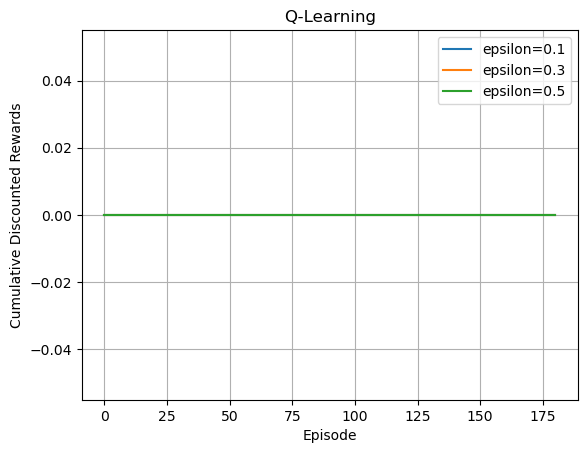

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm
trials = 10
epsilons = [.1, .3, .5]
handles_rewards = []
for epsilon in epsilons:
    all_discounted_rewards = []
    print('epsilon: '+ str(epsilon))
    for trial in tqdm(range(trials)):
        [Q,policy,discounted_rewards] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=epsilon)
        all_discounted_rewards.append(discounted_rewards)
    all_discounted_rewards = np.stack(all_discounted_rewards, axis=0)
    all_discounted_rewards = np.mean(all_discounted_rewards, axis=0)
    # Plot the running mean of 20
    running_mean = np.convolve(all_discounted_rewards, np.ones(20)/20, mode='valid')

    handle_rewards, = plt.plot(np.arange(len(running_mean)), running_mean, label='epsilon='+str(epsilon))
    handles_rewards.append(handle_rewards)

plt.grid()
plt.title('Q-Learning')
plt.legend(handles=handles_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Discounted Rewards')
plt.show()



## Part 2b

Test your code for model-based RL with value iteration on the maze problem 
described above (same maze problem as in Part 1). Produce a graph where 
the x-axis indicates the episode (from 0 to 200) and the y-axis indicates 
the average (based on 20 trials) of the cumulative discounted rewards per 
episode (100 steps). **The graph should contain 1 curve corresponding to 
the exploration probability epsilon=0.1.** The initial state is 0 and the 
initial value function is 0 for all states. Initialize the counts for all 
(s,a,s') to 1 and initialize all average rewards to 0. **How does model-based RL with 
value iteration compare with Q-learning in terms of data efficiency?  Explain.**.

epsilon: 0.1


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 71453.22it/s]


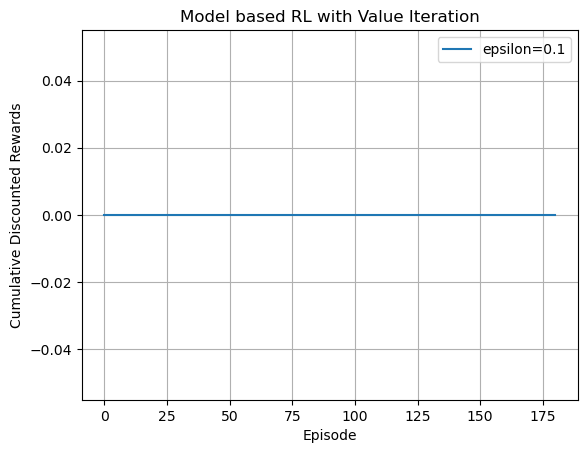

In [5]:
# RL problem
rlProblem = RL(mdp,np.random.normal)

import matplotlib.pyplot as plt
from tqdm import tqdm
trials = 10
epsilon = 0.1
handles_rewards = []
all_discounted_rewards = []
print('epsilon: '+ str(epsilon))
for trial in tqdm(range(trials)):
    [Q,policy,discounted_rewards] = rlProblem.modelBasedRLwithValueIteration(s0=0,initialV=np.zeros([mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=epsilon)
    all_discounted_rewards.append(discounted_rewards)
all_discounted_rewards = np.stack(all_discounted_rewards, axis=0)
all_discounted_rewards = np.mean(all_discounted_rewards, axis=0)
# Plot the running mean of 20 episodes
running_mean = np.convolve(all_discounted_rewards, np.ones(20)/20, mode='valid')

handle_rewards, = plt.plot(np.arange(len(running_mean)), running_mean, label='epsilon='+str(epsilon))
handles_rewards.append(handle_rewards)

plt.grid()
plt.title('Model based RL with Value Iteration')
plt.legend(handles=handles_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Discounted Rewards')
plt.show()
